In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [34]:
# Load the synthetic dataset
data = pd.read_csv('extended_synthetic_self_harm_data.csv')
data.head(), data.describe(), data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   MS-Pos     100 non-null    float64
 1   MS-Neg     100 non-null    float64
 2   MS-Amb     100 non-null    float64
 3   MS-Neu     100 non-null    float64
 4   ME-Ang     100 non-null    float64
 5   ME-Dis     100 non-null    float64
 6   ME-Fea     100 non-null    float64
 7   ME-Joy     100 non-null    float64
 8   ME-Sad     100 non-null    float64
 9   ME-Sur     100 non-null    float64
 10  ME-Neu     100 non-null    float64
 11  M-NST      100 non-null    float64
 12  M-ST       100 non-null    float64
 13  GH-Death   100 non-null    float64
 14  GH-Injure  100 non-null    float64
dtypes: float64(15)
memory usage: 11.8 KB


(     MS-Pos    MS-Neg    MS-Amb    MS-Neu    ME-Ang    ME-Dis    ME-Fea  \
 0  0.374540  0.185133  0.261706  0.672703  0.571996  0.393636  0.648257   
 1  0.950714  0.541901  0.246979  0.796681  0.805432  0.473436  0.172386   
 2  0.731994  0.872946  0.906255  0.250468  0.760161  0.854547  0.872395   
 3  0.598658  0.732225  0.249546  0.624874  0.153900  0.340004  0.613116   
 4  0.156019  0.806561  0.271950  0.571746  0.149249  0.869650  0.157204   
 
      ME-Joy    ME-Sad    ME-Sur    ME-Neu     M-NST      M-ST  GH-Death  \
 0  0.038799  0.720268  0.913578  0.373641  0.533031  0.654306  0.257008   
 1  0.186773  0.687283  0.525360  0.332912  0.137899  0.080033  0.342529   
 2  0.831246  0.095754  0.724910  0.176154  0.591243  0.242330  0.349923   
 3  0.766768  0.922572  0.436048  0.607267  0.314786  0.773679  0.445973   
 4  0.350643  0.568472  0.630035  0.476624  0.052349  0.528686  0.469821   
 
    GH-Injure  
 0   0.319147  
 1   0.379090  
 2   0.461781  
 3   0.440533  
 4  

In [29]:
# Data preprocessing
# Extract features and labels
X = data.drop(['GH-Death', 'GH-Injure'], axis=1)  # Features
y_death = data['GH-Death']  # Target variable for death prediction
y_injury = data['GH-Injure']  # Target variable for injury prediction

# Shuffle the dataset
data_shuffled = shuffle(data, random_state=42)

# Display the shuffled dataset values
print("Shuffled Dataset Head:")
print(data_shuffled.head())

print("\nShuffled Dataset Description:")
print(data_shuffled.describe())

print("\nShuffled Dataset Info:")
print(data_shuffled.info())

# Display features and labels
print("\nFeatures (X) Head:")
print(X.head())

print("\nInjury Labels (y_injury) Head:")
print(y_injury.head())

print("\nDeath Labels (y_death) Head:")
print(y_death.head())

Shuffled Dataset Head:
      MS-Pos    MS-Neg    MS-Amb    MS-Neu    ME-Ang    ME-Dis    ME-Fea  \
83  0.063558  0.879118  0.909220  0.587586  0.747078  0.239820  0.258227   
53  0.894827  0.798783  0.945698  0.287462  0.556191  0.084966  0.394190   
70  0.772245  0.296308  0.756752  0.706630  0.324329  0.552815  0.949281   
45  0.662522  0.615863  0.722814  0.704554  0.427486  0.602469  0.758868   
44  0.258780  0.885978  0.860140  0.737885  0.411190  0.623380  0.700348   

      ME-Joy    ME-Sad    ME-Sur    ME-Neu     M-NST      M-ST  GH-Death  \
83  0.484184  0.105514  0.754940  0.497024  0.618038  0.211038  0.234412   
53  0.483797  0.693169  0.315008  0.409848  0.802289  0.756995  0.447642   
70  0.365048  0.435589  0.886590  0.936343  0.267667  0.463781  0.244553   
45  0.383059  0.100753  0.030020  0.619351  0.713028  0.095536  0.321342   
44  0.932648  0.450987  0.456127  0.764093  0.368375  0.726441  0.397685   

    GH-Injure  
83   0.337586  
53   0.452223  
70   0.439827  

In [30]:
# Split the data into training and testing sets
X_train_death, X_test_death, y_train_death, y_test_death = train_test_split(X, y_death, test_size=0.2, random_state=42)
X_train_injury, X_test_injury, y_train_injury, y_test_injury = train_test_split(X, y_injury, test_size=0.2, random_state=42)
# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y_injury, test_size=0.2, random_state=42)
print("Dataset Train & Test Splits")
print("Total records found in dataset: " + str(X.shape[0]))
print("80% dataset used for training: " + str(X_train.shape[0]))
print("20% dataset used for testing : " + str(X_test.shape[0]))

Dataset Train & Test Splits
Total records found in dataset: 100
80% dataset used for training: 80
20% dataset used for testing : 20


In [5]:
#define global variables to declare rmse,mae,mape
rmse=[]
mae=[]
mape=[]

In [12]:
# Define a function to evaluate the models
def evaluate_model(predictions, true_values):
    mae = mean_absolute_error(true_values, predictions)
    rmse = np.sqrt(mean_squared_error(true_values, predictions))
    mape = np.mean(np.abs((true_values - predictions) / true_values)) * 100
    return mae, rmse, mape

True Death Values	Predicted Death Values
0.34			0.42
0.45			0.31
0.44			0.23
0.22			0.25
0.38			0.52
0.32			0.37
0.56			0.47
0.41			0.38
0.34			0.21
0.32			0.28
0.39			0.34
0.13			0.13
0.16			0.17
0.08			0.15
0.46			0.55
0.34			0.37
0.28			0.37
0.35			0.33
0.62			0.42
0.32			0.40


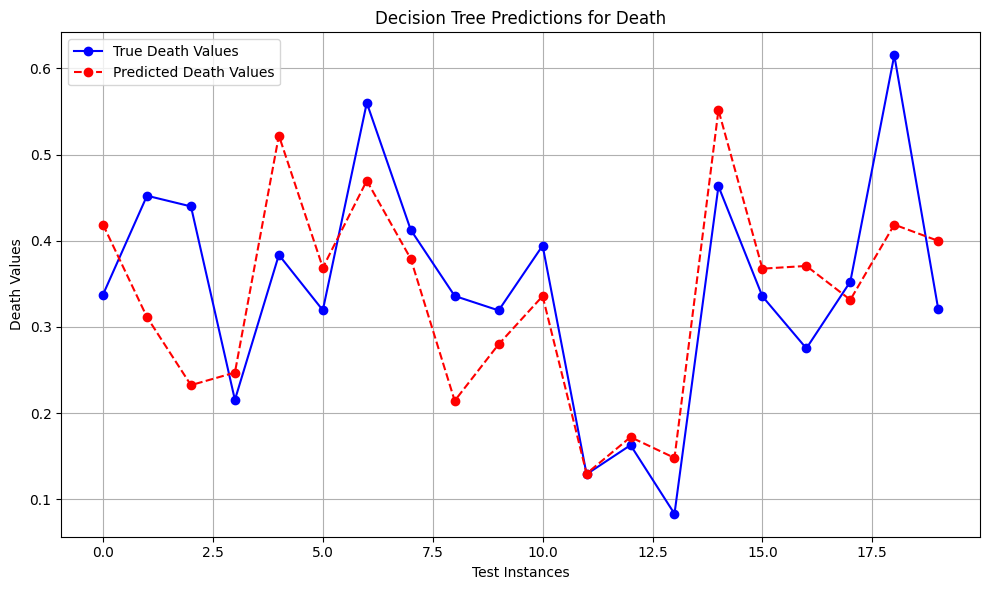


Decision Tree MAE: 0.08
Decision Tree RMSE: 0.10
Decision Tree MAPE: 23.33%


In [13]:
# Decision Tree for death prediction
# Display true death values and predicted death values
print("True Death Values\tPredicted Death Values")
for true_val, pred_val in zip(y_test.values, y_pred):
    print(f"{true_val:.2f}\t\t\t{pred_val:.2f}")

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Plotting true death values vs predicted death values
plt.figure(figsize=(10, 6))

plt.plot(y_test.values, color='blue', marker='o', linestyle='-', label='True Death Values')
plt.plot(y_pred, color='red', marker='o', linestyle='--', label='Predicted Death Values')

plt.title('Decision Tree Predictions for Death')
plt.xlabel('Test Instances')
plt.ylabel('Death Values')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Display evaluation metrics
print(f"\nDecision Tree MAE: {mae:.2f}")
print(f"Decision Tree RMSE: {rmse:.2f}")
print(f"Decision Tree MAPE: {mape:.2f}%")

True Injury Values	Predicted Injury Values
0.34			0.40
0.45			0.31
0.44			0.21
0.22			0.25
0.38			0.49
0.32			0.37
0.56			0.55
0.41			0.38
0.34			0.31
0.32			0.31
0.39			0.38
0.13			0.09
0.16			0.21
0.08			0.09
0.46			0.49
0.34			0.37
0.28			0.37
0.35			0.31
0.62			0.42
0.32			0.40
Decision Tree MAE: 0.06
Decision Tree RMSE: 0.09
Decision Tree MAPE: 18.34%


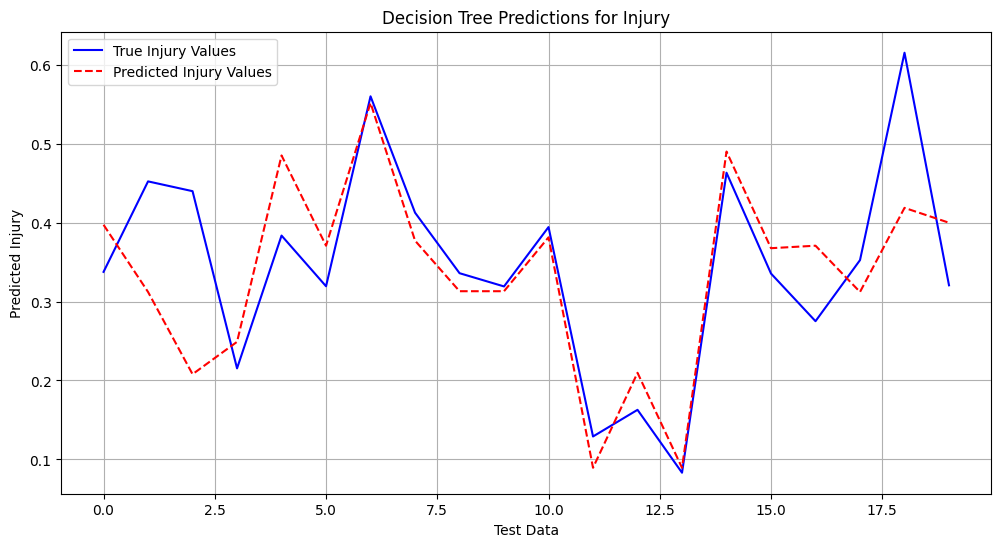

In [15]:
# Decision Tree for injury prediction
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_injury, test_size=0.2, random_state=42)
# Train the Decision Tree Regressor on injury data
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)

# Predict injury values
y_pred = dt_model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# Display true injury values and predicted injury values
print("True Injury Values\tPredicted Injury Values")
for true_val, pred_val in zip(y_test.values, y_pred):
    print(f"{true_val:.2f}\t\t\t{pred_val:.2f}")
    
# Display the metrics
print(f"Decision Tree MAE: {mae:.2f}")
print(f"Decision Tree RMSE: {rmse:.2f}")
print(f"Decision Tree MAPE: {mape:.2f}%")

# Plot True injury values vs Predicted injury values
plt.figure(figsize=(12, 6))

plt.plot(y_test.values, color='blue', label='True Injury Values')
plt.plot(y_pred, color='red', linestyle='--', label='Predicted Injury Values')

plt.title('Decision Tree Predictions for Injury')
plt.xlabel('Test Data')
plt.ylabel('Predicted Injury')
plt.legend()
plt.grid(True)
plt.show()

True Death Values	Predicted Death Values
0.23			0.36
0.45			0.40
0.24			0.23
0.32			0.37
0.40			0.43
0.40			0.26
0.47			0.51
0.38			0.37
0.32			0.30
0.26			0.27
0.42			0.43
0.20			0.17
0.09			0.28
0.03			0.16
0.48			0.48
0.47			0.34
0.30			0.24
0.34			0.37
0.53			0.45
0.37			0.39


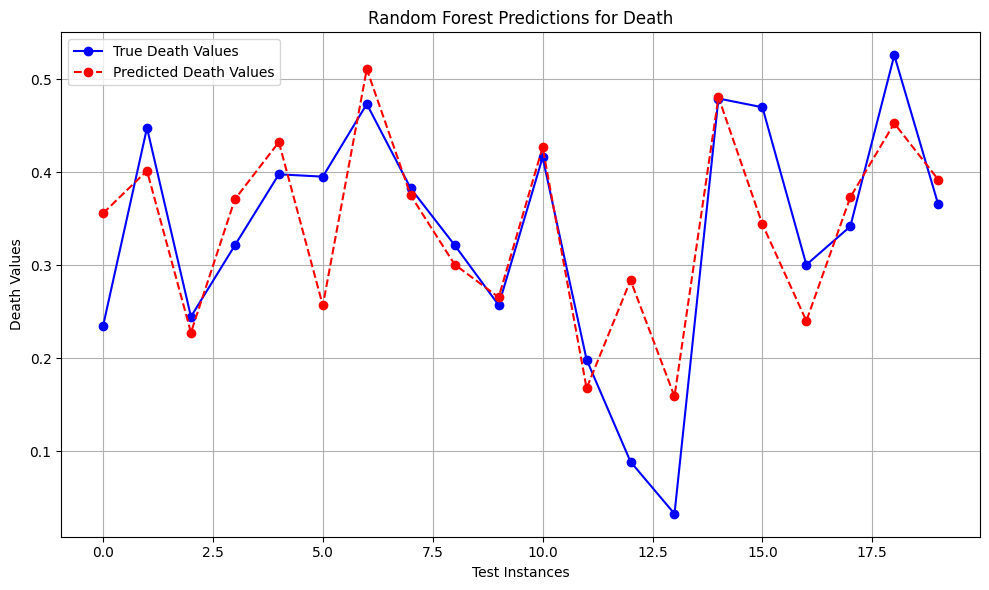


Random Forest MAE (Death): 0.06
Random Forest RMSE (Death): 0.08
Random Forest MAPE: 18.34%


In [16]:
# Random Forest for death prediction
# Train the Random Forest Regressor on death data
rf_model_death = RandomForestRegressor()
rf_model_death.fit(X_train_death, y_train_death)

# Predict death values
y_pred_death = rf_model_death.predict(X_test_death)

# Display true death values and predicted death values
print("True Death Values\tPredicted Death Values")
for true_val, pred_val in zip(y_test_death.values, y_pred_death):
    print(f"{true_val:.2f}\t\t\t{pred_val:.2f}")

# Calculate evaluation metrics for death prediction
mae_death = mean_absolute_error(y_test_death, y_pred_death)
rmse_death = np.sqrt(mean_squared_error(y_test_death, y_pred_death))

# Plotting true death values vs predicted death values
plt.figure(figsize=(10, 6))

plt.plot(y_test_death.values, color='blue', marker='o', linestyle='-', label='True Death Values')
plt.plot(y_pred_death, color='red', marker='o', linestyle='--', label='Predicted Death Values')

plt.title('Random Forest Predictions for Death')
plt.xlabel('Test Instances')
plt.ylabel('Death Values')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Display evaluation metrics for death prediction
print(f"\nRandom Forest MAE (Death): {mae_death:.2f}")
print(f"Random Forest RMSE (Death): {rmse_death:.2f}")
print(f"Random Forest MAPE: {mape:.2f}%")



True Injury Values	Predicted Injury Values
0.34			0.38
0.45			0.38
0.44			0.25
0.22			0.31
0.38			0.41
0.32			0.32
0.56			0.48
0.41			0.33
0.34			0.27
0.32			0.27
0.39			0.40
0.13			0.16
0.16			0.19
0.08			0.14
0.46			0.48
0.34			0.36
0.28			0.28
0.35			0.37
0.62			0.42
0.32			0.36


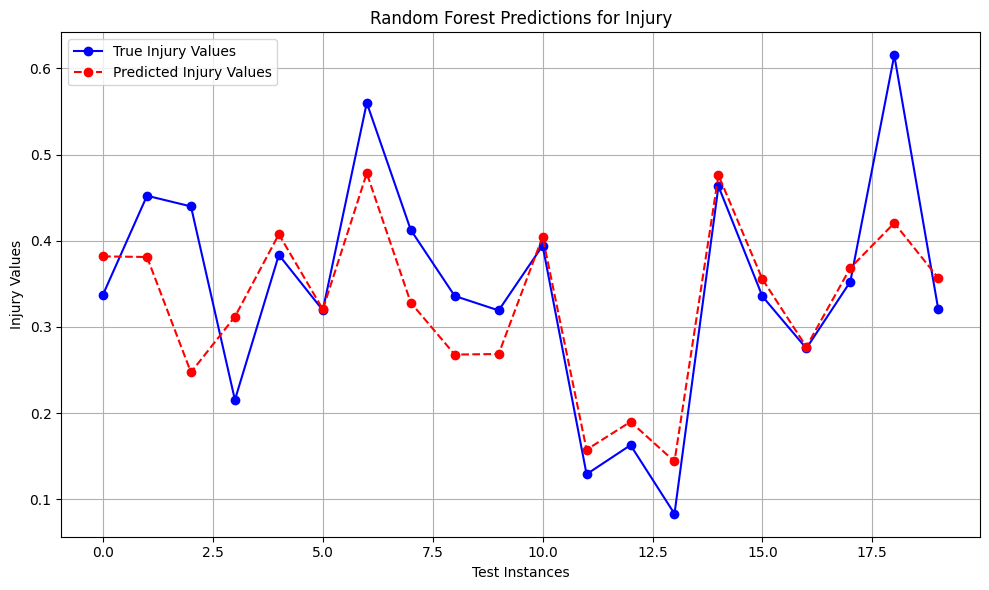


Random Forest MAE (Injury): 0.06
Random Forest RMSE (Injury): 0.08
Random Forest MAPE: 18.34%


In [17]:
# Random Forest for injury prediction
# Train the Random Forest Regressor on injury data
rf_model_injury = RandomForestRegressor()
rf_model_injury.fit(X_train_injury, y_train_injury)

# Predict injury values
y_pred_injury = rf_model_injury.predict(X_test_injury)

# Display true injury values and predicted injury values
print("\nTrue Injury Values\tPredicted Injury Values")
for true_val, pred_val in zip(y_test_injury.values, y_pred_injury):
    print(f"{true_val:.2f}\t\t\t{pred_val:.2f}")

# Calculate evaluation metrics for injury prediction
mae_injury = mean_absolute_error(y_test_injury, y_pred_injury)
rmse_injury = np.sqrt(mean_squared_error(y_test_injury, y_pred_injury))

# Plotting true injury values vs predicted injury values
plt.figure(figsize=(10, 6))

plt.plot(y_test_injury.values, color='blue', marker='o', linestyle='-', label='True Injury Values')
plt.plot(y_pred_injury, color='red', marker='o', linestyle='--', label='Predicted Injury Values')

plt.title('Random Forest Predictions for Injury')
plt.xlabel('Test Instances')
plt.ylabel('Injury Values')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Display evaluation metrics for injury prediction
print(f"\nRandom Forest MAE (Injury): {mae_injury:.2f}")
print(f"Random Forest RMSE (Injury): {rmse_injury:.2f}")
print(f"Random Forest MAPE: {mape:.2f}%")


True Death Values	Predicted Death Values
0.23			0.35
0.45			0.43
0.24			0.24
0.32			0.33
0.40			0.44
0.40			0.30
0.47			0.50
0.38			0.37
0.32			0.31
0.26			0.26
0.42			0.41
0.20			0.17
0.09			0.27
0.03			0.20
0.48			0.46
0.47			0.37
0.30			0.24
0.34			0.38
0.53			0.48
0.37			0.39


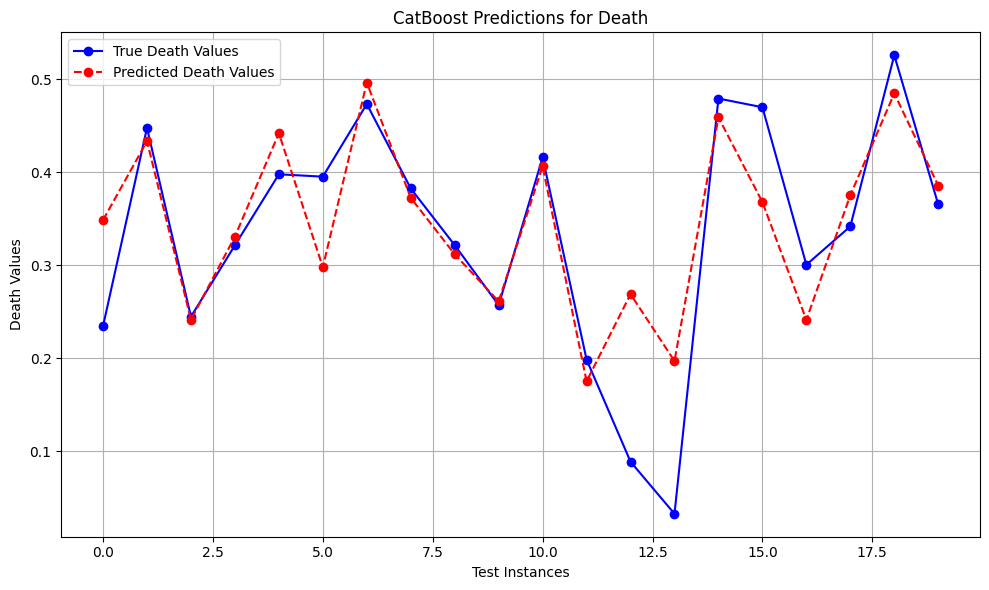


CatBoost MAE (Death): 0.05
CatBoost RMSE (Death): 0.07
CatBoost MAPE: 18.34%


In [18]:
# CatBoost for death prediction
# Train the CatBoost Regressor on death data
cb_model_death = CatBoostRegressor(verbose=0)
cb_model_death.fit(X_train_death, y_train_death)

# Predict death values
y_pred_death = cb_model_death.predict(X_test_death)

# Display true death values and predicted death values
print("True Death Values\tPredicted Death Values")
for true_val, pred_val in zip(y_test_death.values, y_pred_death):
    print(f"{true_val:.2f}\t\t\t{pred_val:.2f}")

# Calculate evaluation metrics for death prediction
mae_death = mean_absolute_error(y_test_death, y_pred_death)
rmse_death = np.sqrt(mean_squared_error(y_test_death, y_pred_death))

# Plotting true death values vs predicted death values
plt.figure(figsize=(10, 6))

plt.plot(y_test_death.values, color='blue', marker='o', linestyle='-', label='True Death Values')
plt.plot(y_pred_death, color='red', marker='o', linestyle='--', label='Predicted Death Values')

plt.title('CatBoost Predictions for Death')
plt.xlabel('Test Instances')
plt.ylabel('Death Values')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Display evaluation metrics for death prediction
print(f"\nCatBoost MAE (Death): {mae_death:.2f}")
print(f"CatBoost RMSE (Death): {rmse_death:.2f}")
print(f"CatBoost MAPE: {mape:.2f}%")


True Injury Values	Predicted Injury Values
0.34			0.34
0.45			0.40
0.44			0.29
0.22			0.30
0.38			0.43
0.32			0.32
0.56			0.47
0.41			0.32
0.34			0.31
0.32			0.29
0.39			0.39
0.13			0.18
0.16			0.23
0.08			0.17
0.46			0.45
0.34			0.35
0.28			0.31
0.35			0.38
0.62			0.45
0.32			0.37


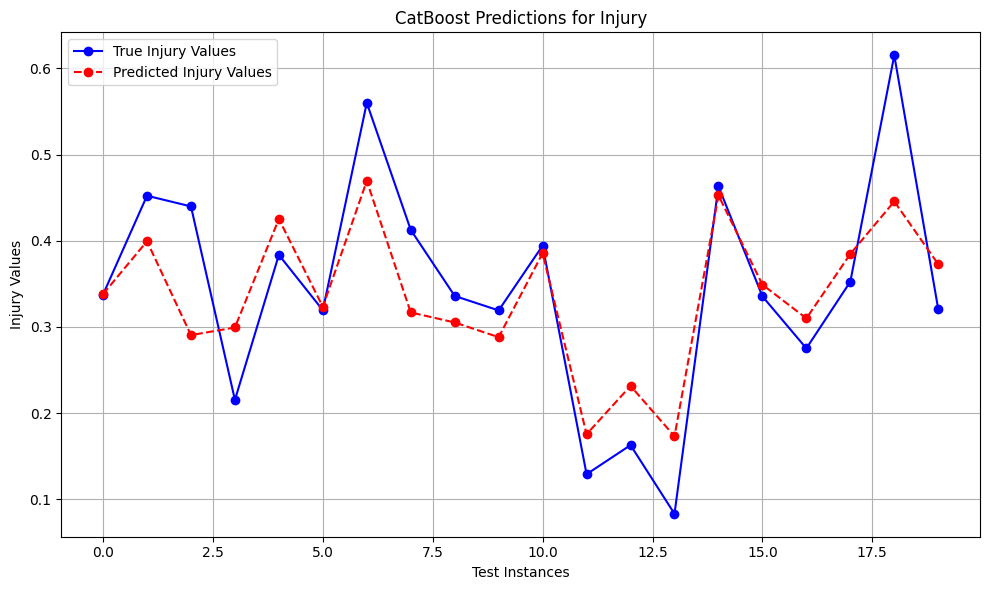


CatBoost MAE (Injury): 0.06
CatBoost RMSE (Injury): 0.07
CatBoost MAPE: 18.34%


In [19]:
# CatBoost for injury prediction
# Train the CatBoost Regressor on injury data
cb_model_injury = CatBoostRegressor(verbose=0)
cb_model_injury.fit(X_train_injury, y_train_injury)

# Predict injury values
y_pred_injury = cb_model_injury.predict(X_test_injury)

# Display true injury values and predicted injury values
print("\nTrue Injury Values\tPredicted Injury Values")
for true_val, pred_val in zip(y_test_injury.values, y_pred_injury):
    print(f"{true_val:.2f}\t\t\t{pred_val:.2f}")

# Calculate evaluation metrics for injury prediction
mae_injury = mean_absolute_error(y_test_injury, y_pred_injury)
rmse_injury = np.sqrt(mean_squared_error(y_test_injury, y_pred_injury))

# Plotting true injury values vs predicted injury values
plt.figure(figsize=(10, 6))

plt.plot(y_test_injury.values, color='blue', marker='o', linestyle='-', label='True Injury Values')
plt.plot(y_pred_injury, color='red', marker='o', linestyle='--', label='Predicted Injury Values')

plt.title('CatBoost Predictions for Injury')
plt.xlabel('Test Instances')
plt.ylabel('Injury Values')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Display evaluation metrics for injury prediction
print(f"\nCatBoost MAE (Injury): {mae_injury:.2f}")
print(f"CatBoost RMSE (Injury): {rmse_injury:.2f}")
print(f"CatBoost MAPE: {mape:.2f}%")

Death Prediction Results
           Model       MAE      RMSE       MAPE
0  Decision Tree  0.097918  0.117850  48.531093
1  Random Forest  0.055386  0.075027  40.644006
2       CatBoost  0.049177  0.071831  44.789344


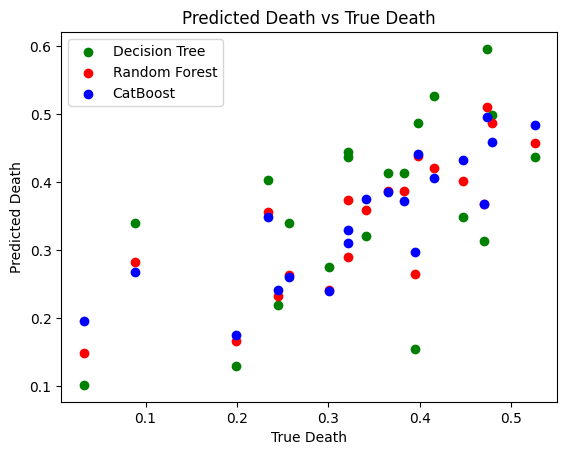

In [31]:
#Death prediction results
# Train the Decision Tree Regressor on death data
dt_model_death = DecisionTreeRegressor()
dt_model_death.fit(X_train_death, y_train_death)
dt_predictions_death = dt_model_death.predict(X_test_death)

# Train the Random Forest Regressor on death data
rf_model_death = RandomForestRegressor()
rf_model_death.fit(X_train_death, y_train_death)
rf_predictions_death = rf_model_death.predict(X_test_death)

# Train the CatBoost Regressor on death data
cb_model_death = CatBoostRegressor(verbose=0)
cb_model_death.fit(X_train_death, y_train_death)
cb_predictions_death = cb_model_death.predict(X_test_death)

# Evaluate models
def evaluate_model(predictions, true_values):
    mae = mean_absolute_error(true_values, predictions)
    rmse = np.sqrt(mean_squared_error(true_values, predictions))
    mape = np.mean(np.abs((true_values - predictions) / true_values)) * 100
    return mae, rmse, mape

# Decision Tree metrics
dt_mae_death, dt_rmse_death, dt_mape_death = evaluate_model(dt_predictions_death, y_test_death)

# Random Forest metrics
rf_mae_death, rf_rmse_death, rf_mape_death = evaluate_model(rf_predictions_death, y_test_death)

# CatBoost metrics
cb_mae_death, cb_rmse_death, cb_mape_death = evaluate_model(cb_predictions_death, y_test_death)

# Compare the results for death prediction
results_death = {
    'Model': ['Decision Tree', 'Random Forest', 'CatBoost'],
    'MAE': [dt_mae_death, rf_mae_death, cb_mae_death],
    'RMSE': [dt_rmse_death, rf_rmse_death, cb_rmse_death],
    'MAPE': [dt_mape_death, rf_mape_death, cb_mape_death]
}
results_death_df = pd.DataFrame(results_death)
print("Death Prediction Results")
print(results_death_df)

# Scatter plot for Decision Tree
plt.scatter(y_test_death.values, dt_predictions_death, color='green', label='Decision Tree')

# Scatter plot for Random Forest
plt.scatter(y_test_death.values, rf_predictions_death, color='red', label='Random Forest')

# Scatter plot for CatBoost
plt.scatter(y_test_death.values, cb_predictions_death, color='blue', label='CatBoost')

plt.title('Predicted Death vs True Death')
plt.xlabel('True Death')
plt.ylabel('Predicted Death')
plt.legend()
plt.show()

Injury Prediction Results
           Model       MAE      RMSE       MAPE
0  Decision Tree  0.070942  0.091330  23.268935
1  Random Forest  0.057049  0.075759  19.053719
2       CatBoost  0.055368  0.071507  20.784310


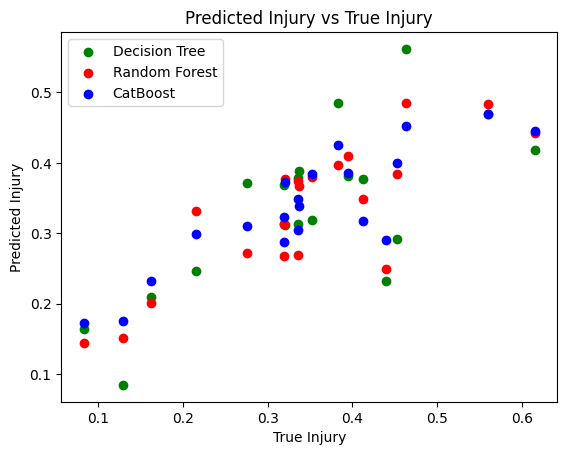

In [36]:
# Train the Decision Tree Regressor on injury data
dt_model_injury = DecisionTreeRegressor()
dt_model_injury.fit(X_train_injury, y_train_injury)
dt_predictions_injury = dt_model_injury.predict(X_test_injury)

# Train the Random Forest Regressor on injury data
rf_model_injury = RandomForestRegressor()
rf_model_injury.fit(X_train_injury, y_train_injury)
rf_predictions_injury = rf_model_injury.predict(X_test_injury)

# Train the CatBoost Regressor on injury data
cb_model_injury = CatBoostRegressor(verbose=0)
cb_model_injury.fit(X_train_injury, y_train_injury)
cb_predictions_injury = cb_model_injury.predict(X_test_injury)

# Evaluate models
def evaluate_model(predictions, true_values):
    mae = mean_absolute_error(true_values, predictions)
    rmse = np.sqrt(mean_squared_error(true_values, predictions))
    mape = np.mean(np.abs((true_values - predictions) / true_values)) * 100
    return mae, rmse, mape

# Decision Tree metrics
dt_mae_injury, dt_rmse_injury, dt_mape_injury = evaluate_model(dt_predictions_injury, y_test_injury)

# Random Forest metrics
rf_mae_injury, rf_rmse_injury, rf_mape_injury = evaluate_model(rf_predictions_injury, y_test_injury)

# CatBoost metrics
cb_mae_injury, cb_rmse_injury, cb_mape_injury = evaluate_model(cb_predictions_injury, y_test_injury)

# Compare the results for injury prediction
results_injury = {
    'Model': ['Decision Tree', 'Random Forest', 'CatBoost'],
    'MAE': [dt_mae_injury, rf_mae_injury, cb_mae_injury],
    'RMSE': [dt_rmse_injury, rf_rmse_injury, cb_rmse_injury],
    'MAPE': [dt_mape_injury, rf_mape_injury, cb_mape_injury]
}
results_injury_df = pd.DataFrame(results_injury)
print("Injury Prediction Results")
print(results_injury_df)

# Scatter plot for Decision Tree
plt.scatter(y_test_injury.values, dt_predictions_injury, color='green', label='Decision Tree')

# Scatter plot for Random Forest
plt.scatter(y_test_injury.values, rf_predictions_injury, color='red', label='Random Forest')

# Scatter plot for CatBoost
plt.scatter(y_test_injury.values, cb_predictions_injury, color='blue', label='CatBoost')

plt.title('Predicted Injury vs True Injury')
plt.xlabel('True Injury')
plt.ylabel('Predicted Injury')
plt.legend()
plt.show()